In [22]:
from TSP_Formulation_Methods import *
import numpy as np

distances_original_matrix = np.loadtxt("./data/matriz-rutas-granada")

# Global Parameters

N = 5 # Number of stops
p = 2 # Number of travels, aka number of edges. The number of involucred stops is then p+1
startNode = 2
endNode = 3

# Process Parameters

p = min(p, N-1)
startNode = min(startNode, N-1)
endNode = min(endNode, N-1)

distances_N_stops_normalized = distances_original_matrix[:N,:N]/np.max(distances_original_matrix[:N,:N])


Optimized solution:
[1 0 0 0 0 0 1 0 0 0 0 0 0 0 1]

Optimized solution cost:
1.449521410098581

Optimized solution total cost:
2.839808373176062

Validity of the solution:
True


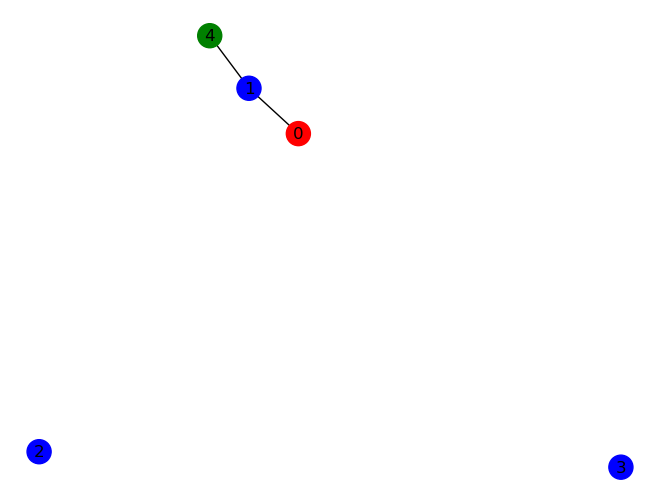

In [2]:
# Naive solution

naive_solution = generate_valid_initial_solution(N, p, startNode, endNode)

show_parameters_of_solution(naive_solution, distances_N_stops_normalized, N, p, startNode, endNode)

draw_solution_graph(naive_solution, distances_N_stops_normalized, p, startNode, endNode)


Optimized solution:
[1 0 0 0 0 0 0 1 0 0 0 0 0 0 1]

Optimized solution cost:
0.5084218462213824

Optimized solution total cost:
1.0002385792130704

Lambdas:
[1.56877627950032, 0.9687762795003195, 0.46877627950031964, 0.36877627950031966, 0.36877627950031966]

Validity of the solution:
True

Q matrix of optimized solution:
[[-5.21265768  2.53755256  2.53755256  2.53755256  2.53755256  1.43755256
   1.57693378  1.22080182  1.21663145  1.36378711  1.43755256  0.96877628
   0.96877628  0.96877628  0.96877628]
 [ 2.53755256 -4.8438814   2.53755256  2.53755256  2.53755256  1.35906324
   1.43755256  1.59586743  1.16348555  1.81014019  0.96877628  1.43755256
   0.96877628  0.96877628  0.96877628]
 [ 2.53755256  2.53755256 -4.8438814   2.53755256  2.53755256  1.21643105
   1.64302022  1.43755256  1.42886198  1.22517259  0.96877628  0.96877628
   1.43755256  0.96877628  0.96877628]
 [ 2.53755256  2.53755256  2.53755256 -4.8438814   2.53755256  1.1873721
   1.17923177  1.52327254  1.43755256  1

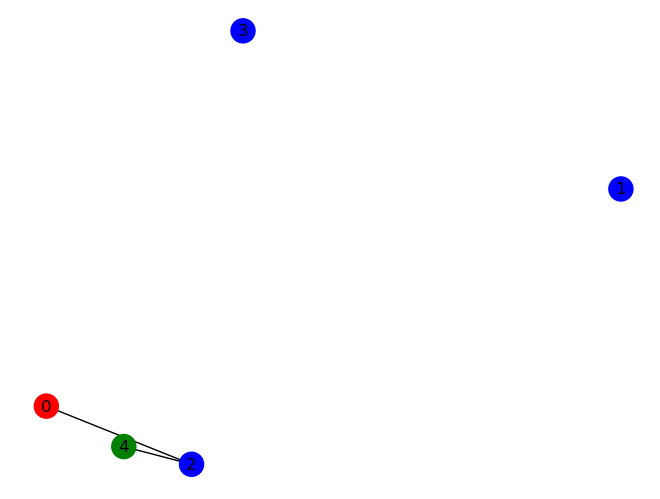

In [3]:
scalingFactor = 0.1
max_iterations = 1000
num_reads = 1000

optimized_solution, optimized_lambdas = find_optimized_solution(distances_N_stops_normalized, p, N, startNode, endNode, scalingFactor, max_iterations, num_reads)

Q_matrix_optimized, optimized_solution_cost, optimized_solution_total_cost = show_parameters_of_solution(optimized_solution, distances_N_stops_normalized, N, p, startNode, endNode, optimized_lambdas)

print("\nQ matrix of optimized solution:")
print(Q_matrix_optimized)

draw_solution_graph(optimized_solution, distances_N_stops_normalized, p, startNode, endNode)


Optimized solution:
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]

Optimized solution cost:
0.0

Optimized solution total cost:
0.46629830036168607

Validity of the solution:
False


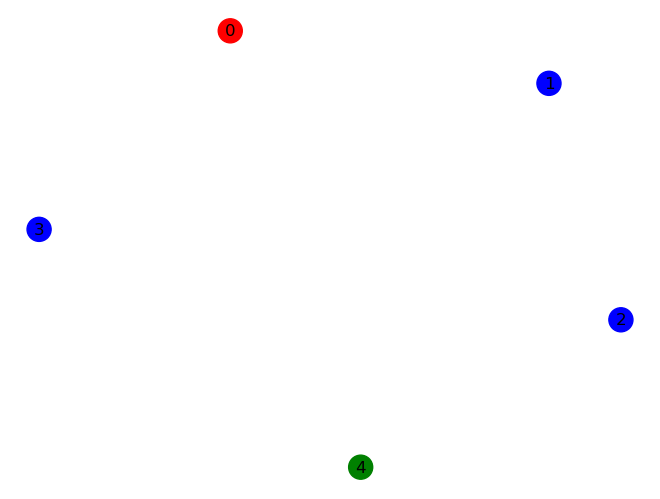

In [4]:
combinations_zipped = brute_force_finding(Q_matrix_optimized, distances_N_stops_normalized, p)

global_minimum = np.array(list(combinations_zipped[0][0]), dtype=int)

show_parameters_of_solution(global_minimum, distances_N_stops_normalized, N, p, startNode, endNode)

draw_solution_graph(global_minimum, distances_N_stops_normalized, p, startNode, endNode)

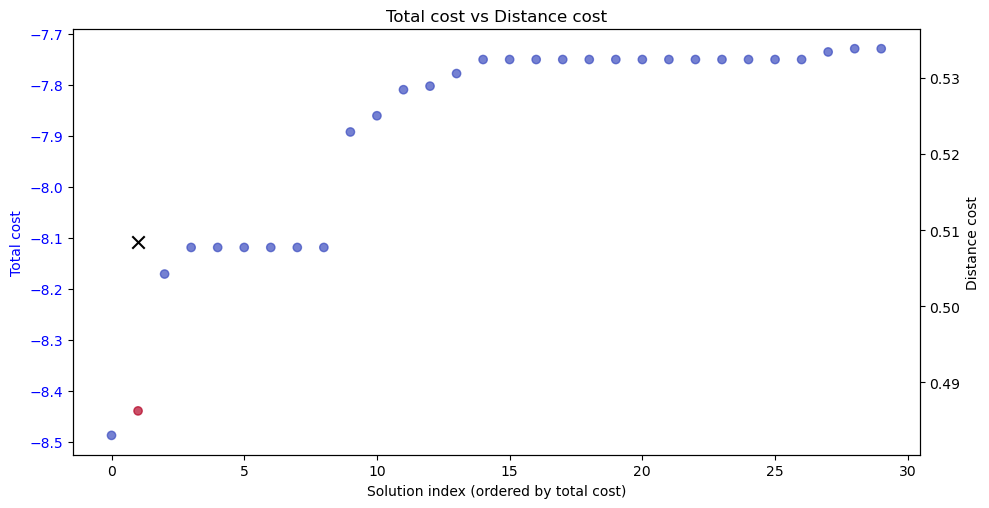

In [5]:
rangePlot = 30

plot_brute_force_minimums(combinations_zipped, N, p, startNode, endNode, rangePlot=rangePlot)

violation_of_constraints = count_most_violated_constraints(combinations_zipped, N, p, startNode, endNode, plotRange=rangePlot)

initial_lambdas = [optimized_lambdas[i]+violation_of_constraints[i] for i in range(5)]


Optimized solution:
[1 0 0 0 0 0 0 1 0 0 0 0 0 0 1]

Optimized solution cost:
0.5084218462213824

Optimized solution total cost:
1.0002385792130704

Lambdas:
[2.868776279500321, 1.6354429461669862, 0.5354429461669863, 1.0687762795003195, 1.202109612833653]

Validity of the solution:
True

Q matrix of optimized solution:
[[-9.24599101  4.50421923  4.50421923  4.50421923  4.50421923  2.17088589
   2.24360045  1.88746848  1.88329812  2.03045378  2.17088589  1.63544295
   1.63544295  1.63544295  1.63544295]
 [ 4.50421923 -8.17721473  4.50421923  4.50421923  4.50421923  2.02572991
   2.17088589  2.26253409  1.83015221  2.47680686  1.63544295  2.17088589
   1.63544295  1.63544295  1.63544295]
 [ 4.50421923  4.50421923 -8.17721473  4.50421923  4.50421923  1.88309771
   2.30968689  2.17088589  2.09552864  1.89183925  1.63544295  1.63544295
   2.17088589  1.63544295  1.63544295]
 [ 4.50421923  4.50421923  4.50421923 -8.17721473  4.50421923  1.85403876
   1.84589844  2.18993921  2.17088589  2.4

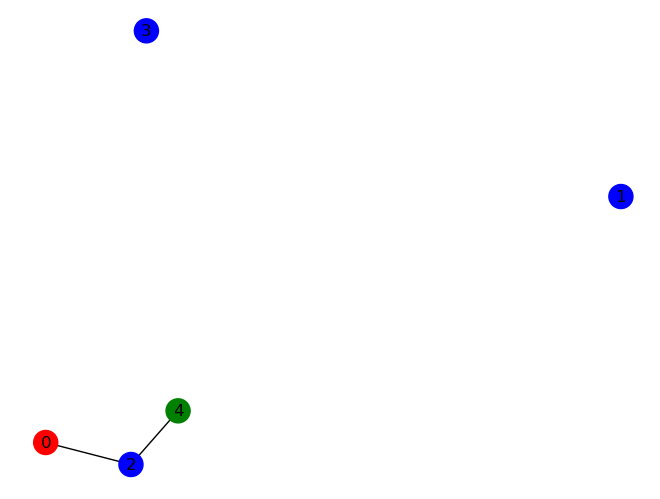

In [6]:
# Repeat the process with new initial lambdas

optimized_solution, optimized_lambdas = find_optimized_solution(distances_N_stops_normalized, p, N, startNode, endNode, scalingFactor, max_iterations, num_reads, initial_lambdas)

Q_matrix_optimized, optimized_solution_cost, optimized_solution_total_cost = show_parameters_of_solution(optimized_solution, distances_N_stops_normalized, N, p, startNode, endNode, optimized_lambdas)

print("\nQ matrix of optimized solution:")
print(Q_matrix_optimized)

draw_solution_graph(optimized_solution, distances_N_stops_normalized, p, startNode, endNode)


Optimized solution:
[1 0 0 0 0 0 0 1 0 0 0 0 0 0 1]

Optimized solution cost:
0.5084218462213824

Optimized solution total cost:
1.0002385792130704

Validity of the solution:
True


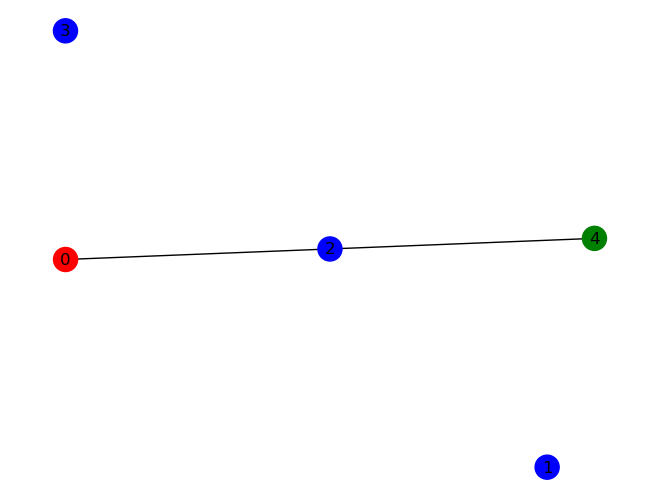

In [7]:
combinations_zipped = brute_force_finding(Q_matrix_optimized, distances_N_stops_normalized, p)

global_minimum = np.array(list(combinations_zipped[0][0]), dtype=int)

show_parameters_of_solution(global_minimum, distances_N_stops_normalized, N, p, startNode, endNode)

draw_solution_graph(global_minimum, distances_N_stops_normalized, p, startNode, endNode)

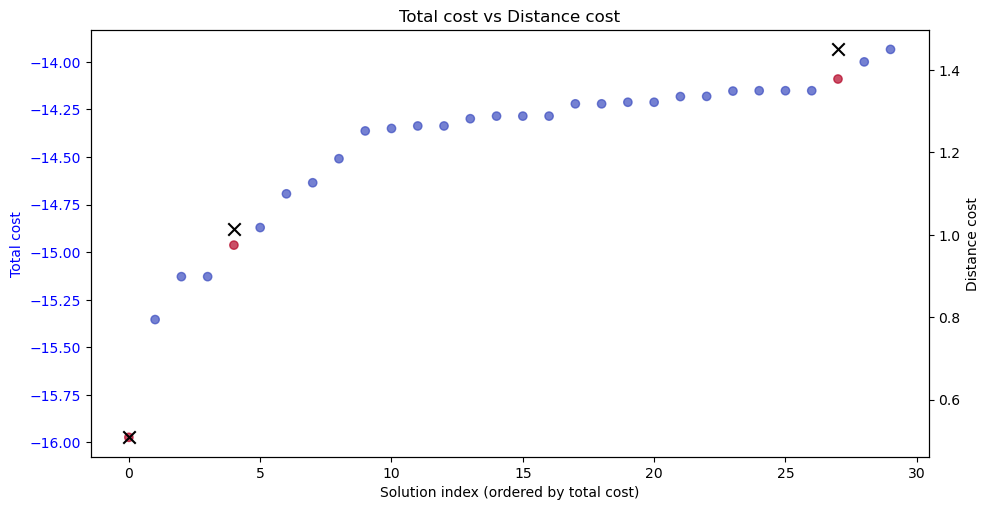

In [8]:
plot_brute_force_minimums(combinations_zipped, N, p, startNode, endNode, rangePlot=rangePlot)

In [23]:
# Iterate the whole process

iterations_process = 5
scalingFactor = 0.1
max_iterations_per_process = 10
num_reads_solver = 1000
rangePlot = 30

optimized_solution, optimized_lambdas = find_optimized_solution(distances_N_stops_normalized, p, N, startNode, endNode, scalingFactor, max_iterations_per_process, num_reads_solver)

Q_matrix_optimized,_ = create_QUBO_matrix(distances_N_stops_normalized, p, startNode, endNode, optimized_lambdas)

combinations_zipped = brute_force_finding(Q_matrix_optimized, distances_N_stops_normalized, p)

violation_of_constraints = count_most_violated_constraints(combinations_zipped, N, p, startNode, endNode, plotRange=rangePlot)

initial_lambdas = [optimized_lambdas[i]+violation_of_constraints[i] for i in range(5)]

for i in range(iterations_process-1):
    optimized_solution, optimized_lambdas = find_optimized_solution(distances_N_stops_normalized, p, N, startNode, endNode, scalingFactor, max_iterations_per_process, num_reads_solver, initial_lambdas)

    Q_matrix_optimized,_ = create_QUBO_matrix(distances_N_stops_normalized, p, startNode, endNode, optimized_lambdas)

    combinations_zipped = brute_force_finding(Q_matrix_optimized, distances_N_stops_normalized, p)

    if i != iterations_process-2:
        violation_of_constraints = count_most_violated_constraints(combinations_zipped, N, p, startNode, endNode, plotRange=rangePlot)
        initial_lambdas = [optimized_lambdas[i]+violation_of_constraints[i] for i in range(5)]

    

No solution found



Optimized solution:
[0 0 1 0 0 1 0 0 0 0 0 0 0 1 0]

Optimized solution cost:
0.4955099392100165

Optimized solution total cost:
0.9661312949125369

Lambdas:
[4.168776279500322, 2.2687762795003197, 1.302109612833653, 2.735442946166986, 4.16877627950032]

Validity of the solution:
True

Q matrix of optimized solution:
[[-11.3438814    6.43755256   6.43755256   6.43755256   6.43755256
    3.57088589   2.87693378   2.52080182   2.51663145   2.66378711
    3.57088589   2.26877628   2.26877628   2.26877628   2.26877628]
 [  6.43755256 -11.3438814    6.43755256   6.43755256   6.43755256
    2.65906324   3.57088589   2.89586743   2.46348555   3.11014019
    2.26877628   3.57088589   2.26877628   2.26877628   2.26877628]
 [  6.43755256   6.43755256 -14.07932434   6.43755256   6.43755256
    2.51643105   2.94302022   3.57088589   2.72886198   2.52517259
    2.26877628   2.26877628   3.57088589   2.26877628   2.26877628]
 [  6.43755256   6.43755256   6.43755256 -11.3438814    6.43755256
    2.4

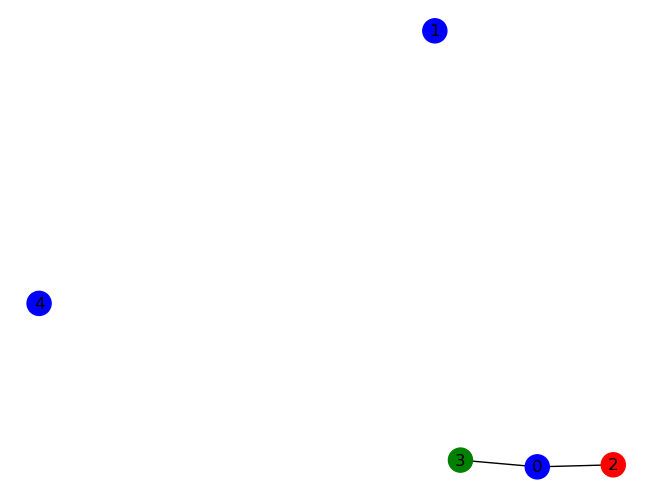

In [24]:
Q_matrix_optimized, optimized_solution_cost, optimized_solution_total_cost = show_parameters_of_solution(optimized_solution, distances_N_stops_normalized, N, p, startNode, endNode, optimized_lambdas)

print("\nQ matrix of optimized solution:")
print(Q_matrix_optimized)

draw_solution_graph(optimized_solution, distances_N_stops_normalized, p, startNode, endNode)


Optimized solution:
[0 0 1 0 0 1 0 0 0 0 0 0 0 1 0]

Optimized solution cost:
0.4955099392100165

Optimized solution total cost:
0.9661312949125369

Validity of the solution:
True


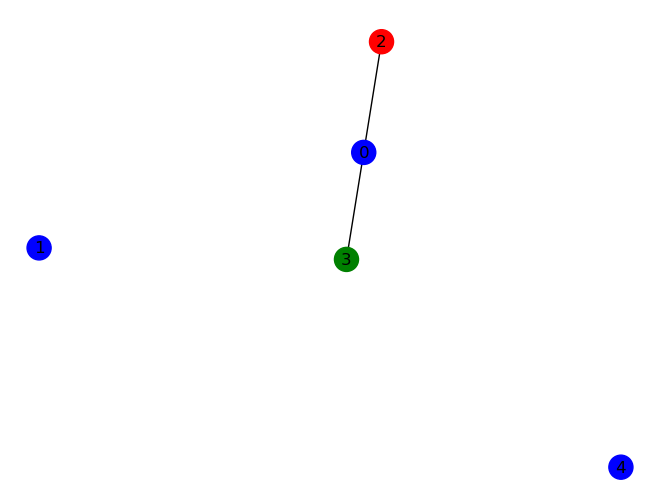

In [25]:
global_minimum = np.array(list(combinations_zipped[0][0]), dtype=int)

show_parameters_of_solution(global_minimum, distances_N_stops_normalized, N, p, startNode, endNode)

draw_solution_graph(global_minimum, distances_N_stops_normalized, p, startNode, endNode)

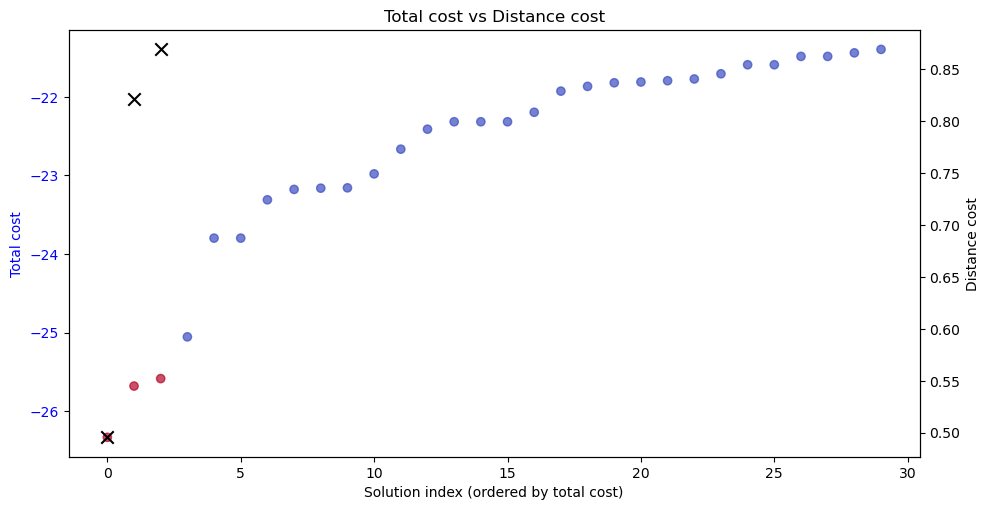

In [26]:
plot_brute_force_minimums(combinations_zipped, N, p, startNode, endNode, rangePlot=rangePlot)

In [27]:
# Store the lambdas in a file, to be used in the next iteration.
# We use the naming to store the lambdas in a folder with the same name as the parameters of the problem
# Create the folder data/lambdasOptimized if it does not exist
import os
try:
    os.mkdir("./data/lamdasOptimized")
except:
    pass

np.savetxt("./data/lamdasOptimized/lambdas_N_{}_p_{}_startNode_{}_endNode_{}".format(N, p,startNode,endNode ), optimized_lambdas, delimiter=",")